# When Does The Moon Rise in Accra, Ghana on 2020-10-20

## Authors: 
Jielai Zhang

## Learning Goals:
- Find time now in Python
- Learn how to define parameters for a telescope observatory in Python
- Learn how to find out sunset, sunrise, moonset and moonrise times for the telescope observatory in Python
- Change date time in string format to datetime format
- Plot verticle lines with time on the x-axis

## Keywords
Astroplan, observing preparation

## Summary
This tutorial describes how to get the location information for an observatory, get the position information for an object in the sky and find out what time it will rise on a given date. The exercise will be done using Universal Time.

In [1]:
from astropy.time import Time
from astroplan import download_IERS_A 
from astropy.coordinates import EarthLocation
from astroplan import Observer
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

### Question 1
What is your name? Print it out.

In [2]:
# Fill in this cell with your name, and print out your name using the print statement.
applicant_name = 'Ejelonu O. Benedict'
print('My name is',applicant_name)

My name is Ejelonu O. Benedict


### What is the current UTC?

In [3]:
now = Time.now()
print(now)
print(now.decimalyear)

2020-10-25 23:31:22.843477
2020.8168855888066


### How much time has passed since WAISSYA 2019 (WAISSYA is now named PASEA)

In [4]:
time_pasea2019 = Time("2019-11-02", format='iso')
time_passed    = now-time_pasea2019
print(time_passed,'days')

358.980125503206 days


### Check to see what observatories are available in the "EarthLocation" database.

In [5]:
print((EarthLocation.get_site_names()))

['', '', '', 'ALMA', 'ATST', 'Anglo-Australian Observatory', 'Apache Point', 'Apache Point Observatory', 'Atacama Large Millimeter Array', 'BAO', 'BBSO', 'Beijing XingLong Observatory', 'Black Moshannon Observatory', 'CHARA', 'Canada-France-Hawaii Telescope', 'Catalina Observatory', 'Cerro Pachon', 'Cerro Paranal', 'Cerro Tololo', 'Cerro Tololo Interamerican Observatory', 'DCT', 'DKIST', 'Discovery Channel Telescope', 'Dominion Astrophysical Observatory', 'GBT', 'Gemini South', 'Green Bank Telescope', 'Hale Telescope', 'Haleakala Observatories', 'Happy Jack', 'IAO', 'JCMT', 'James Clerk Maxwell Telescope', 'Jansky Very Large Array', 'Keck Observatory', 'Kitt Peak', 'Kitt Peak National Observatory', 'La Silla Observatory', 'Large Binocular Telescope', 'Las Campanas Observatory', 'Lick Observatory', 'Lowell Observatory', 'MWA', 'Manastash Ridge Observatory', 'McDonald Observatory', 'Medicina', 'Medicina Dish', 'Michigan-Dartmouth-MIT Observatory', 'Mount Graham International Observatory'

### Setting up observatory location

In [6]:
location  = EarthLocation.of_site("Cerro Tololo")
CerroTololo = Observer(location = location, timezone = 'America/Santiago',
                             name = "CT", description = "Cerro Tololo Telescope")

### Question 2
What is the Longtitude, Latitutde and Elevation of the Cerro Tololo Telescope as specified here?

In [7]:
# Fill in this cell to print the Longitude, Latitutde and Elevation inforamtion of the Cerro Tololo Telescope
# I have not told you how to do this, have a think and try printing a few things until it works. 
# You are free to do searches on google, though it may take longer than just trying to print things until it works.

#Solution:
print(f'The Longitude, Latitude and Elevation of the Cerro Tololo Telescope is given as:\n{location}')

The Longitude, Latitude and Elevation of the Cerro Tololo Telescope is given as:
(1814303.74553723, -5214365.7436216, -3187340.56598756) m


In [8]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
download_IERS_A()


### Sunset, Sunrise, Midnight

In [11]:
# Calculating the sunset, sunrise times for our observatory 
sunset_CT = CerroTololo.sun_set_time(now, which='nearest')
sunrise_CT = CerroTololo.sun_rise_time(now, which='next')

# Print sunset_CT and sunset_CT.iso to see what the difference is
print('Tests:')
print(sunset_CT)
print(sunset_CT.iso)
print('')

# Print out the sunset and sunrise times in the nicer way.
print('Sunset and Sunrise:')
print("Sunset at Cerro Tololo will be at {0.iso} UTC".format(sunset_CT))
print("Sunrise at Cerro Tololo will be at {0.iso} UTC".format(sunrise_CT))

Tests:
2459148.456151031
2020-10-25 22:56:51.449

Sunset and Sunrise:
Sunset at Cerro Tololo will be at 2020-10-25 22:56:51.449 UTC
Sunrise at Cerro Tololo will be at 2020-10-26 09:57:10.900 UTC


In [12]:
#checking current format:
sunset_CT.format

'jd'

### Question 3
Find the effective length of time (in hours) between sunset and sunrise in Cerre Tololo tonight.

In [13]:
#solution:

def conv_to_hours(days):
    '''1day =24 hrs
    xdays=24*x hrs'''
    return days*24

In [14]:
# Fill in this cell to print number of hours between sunset and sunrise during the next night in Cerro Tololo.
# I have not told you how to do this, have a think and try printing a few things until it works. 
# You are free to do searches on google, though it may take longer than just trying to print things until it works.
difference=sunrise_CT-sunset_CT
print(f'number of hours between sunset and sunrise: \n{conv_to_hours(sunrise_CT-sunset_CT)} hours ')

number of hours between sunset and sunrise: 
11.005402933806181 hours 


### Question 4
What is the moonrise and moonset time in Cerro Tololo?

In [15]:
# Fill in this cell to print out the next moonrise and moon
# set time in Cerro Tololo

moonset_CT = CerroTololo.moon_set_time(now, which='nearest')
moonrise_CT = CerroTololo.moon_rise_time(now, which='next')

print(f'Tests \n{moonset_CT} \n{moonset_CT.iso}')
print('-------------------')
print('moonrise and moonset:')
print(f'moonset at Cerro Tololo will be at {moonset_CT.iso}')
print(f'moonrise at Cerro Tololo will be at {moonrise_CT.iso}')

Tests 
2459148.8108662697 
2020-10-26 07:27:38.846
-------------------
moonrise and moonset:
moonset at Cerro Tololo will be at 2020-10-26 07:27:38.846
moonrise at Cerro Tololo will be at 2020-10-26 18:54:16.365


### Question 5 (a)
Turn sunset_CT, sunrise_CT, moonset_CT and moonrise_CT into datetime objects. 

In [16]:
#solution:
#converting into datetime objects

for i in [sunset_CT,sunrise_CT,moonset_CT,moonrise_CT]:
    i.format='datetime'

In [17]:
#e.g
print(sunset_CT.format)
sunset_CT

#format has been clearly converted

datetime


<Time object: scale='utc' format='datetime' value=2020-10-25 22:56:51.449075>

### Question 5 (b)
Plot the sunset, sunrise, moonset, moonrise times on a plot as verticle lines of different colours. Inlcude a legend, plot title and x-axis label. You are free to set the y-axis range as you like.

**solution:**

In [18]:
list_of_dates=[i.value for i in (sunset_CT,sunrise_CT,moonset_CT,moonrise_CT)]

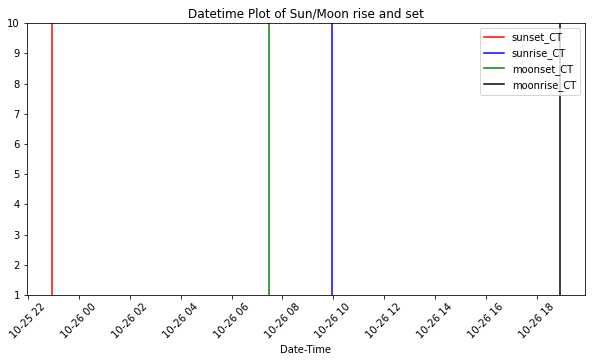

In [20]:
random_sequence_of_numbers=[1,2,3,4,5,6,7,8,9,10]
CTs=['sunset_CT','sunrise_CT','moonset_CT','moonrise_CT']
colors=['red','blue','green','k']
fig=plt.figure(figsize=(10,5))
for i in range(len(list_of_dates)):
    plt.plot(10*[list_of_dates[i]],random_sequence_of_numbers,
                  label=str(CTs[i]),c=colors[i])
plt.title('Datetime Plot of Sun/Moon rise and set')
plt.legend(loc='upper right')
plt.xlabel('Date-Time')
plt.xticks(rotation=45)
plt.ylim([1,10])
plt.show()